In [1]:
#Import all neccesary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import quandl
quandl.ApiConfig.api_key = "vUnpR71xPvscRaSSA-iz"

In [2]:
#Amount of Money Invested
money = 1e6

In [3]:
#Create a start and end time dataframe
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [4]:
#Use quandl to obtain FAANG stock data
apple = quandl.get('WIKI/AAPL.11',start_date = start,end_date = end) #Apple
google = quandl.get('WIKI/GOOGL.11',start_date = start, end_date = end)#Google
facebook = quandl.get('WIKI/FB.11', start_date = start, end_date = end)#Facebook
amazon = quandl.get('WIKI/AMZN.11', start_date = start, end_date = end)#Amazon
netflix = quandl.get('WIKI/NFLX.11', start_date = start, end_date = end)#Netflix

In [5]:
#Calculating cumulative daily returns (normalized daily returns) of each company
for stock_df in (facebook,apple,amazon,netflix,google): #stock_df is a placeholder for the FAANG list 
    stock_df['Cumlit. Daily Returns'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close'] 

In [6]:
apple.tail()

,Adj. Close,Cumlit. Daily Returns
Date,,
2016-12-23,115.080808,2.177549
2016-12-27,115.811668,2.191378
2016-12-28,115.317843,2.182034
2016-12-29,115.288214,2.181473
2016-12-30,114.389454,2.164467


In [8]:
#Portfolio Allocation

#We are going to allocate 20% in each company
for stock_df, allo in zip((facebook,apple,amazon,netflix,google),[0.2,0.2,0.2,0.2,0.2]):
    stock_df['Assest Allocation'] = stock_df['Cumlit. Daily Returns'] * allo

In [9]:
apple.head()

,Adj. Close,Cumlit. Daily Returns,Assest Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.200000
2012-01-04,53.132802,1.005374,0.201075
2012-01-05,53.722681,1.016536,0.203307
2012-01-06,54.284287,1.027162,0.205432
2012-01-09,54.198183,1.025533,0.205107


In [10]:
for stock_df in (facebook,apple,amazon,netflix,google):
    stock_df['Positional Value'] = stock_df['Assest Allocation'] * money

In [11]:
facebook.head()

,Adj. Close,Cumlit. Daily Returns,Assest Allocation,Positional Value
Date,,,,
2012-05-18,38.2318,1.000000,0.200000,200000.000000
2012-05-21,34.0300,0.890097,0.178019,178019.345152
2012-05-22,31.0000,0.810843,0.162169,162168.665875
2012-05-23,32.0000,0.837000,0.167400,167399.913161
2012-05-24,33.0300,0.863940,0.172788,172788.097866


In [12]:
all_pos_values = [facebook['Positional Value'],amazon['Positional Value'],apple['Positional Value'],
                 netflix['Positional Value'],google['Positional Value']]
portfolio_value = pd.concat(all_pos_values, axis = 1)
portfolio_value.columns = ['Facebook Position','Amazon Position', 'Apple Position','Netflix Position','Google Position' ]

In [13]:
portfolio_value.tail()

,Facebook Position,Amazon Position,Apple Position,Netflix Position,Google Position
Date,,,,,
2016-12-23,613468.369263,849678.824778,435509.744719,2.433915e+06,484096.360912
2016-12-27,617339.492255,861755.013126,438275.597887,2.487403e+06,485372.821978
2016-12-28,611637.432713,862570.518907,436406.778179,2.439729e+06,482160.694601
2016-12-29,608655.621760,854772.943082,436294.648996,2.428876e+06,481147.915634
2016-12-30,601855.000288,837703.178238,432893.397128,2.399225e+06,474897.451355


In [14]:
#Now we want the total value of the portfolio
portfolio_value['Total Value of Portfolio'] = portfolio_value.sum(axis = 1)
portfolio_value.tail()

,Facebook Position,Amazon Position,Apple Position,Netflix Position,Google Position,Total Value of Portfolio
Date,,,,,,
2016-12-23,613468.369263,849678.824778,435509.744719,2.433915e+06,484096.360912,4.816668e+06
2016-12-27,617339.492255,861755.013126,438275.597887,2.487403e+06,485372.821978,4.890146e+06
2016-12-28,611637.432713,862570.518907,436406.778179,2.439729e+06,482160.694601,4.832504e+06
2016-12-29,608655.621760,854772.943082,436294.648996,2.428876e+06,481147.915634,4.809747e+06
2016-12-30,601855.000288,837703.178238,432893.397128,2.399225e+06,474897.451355,4.746574e+06


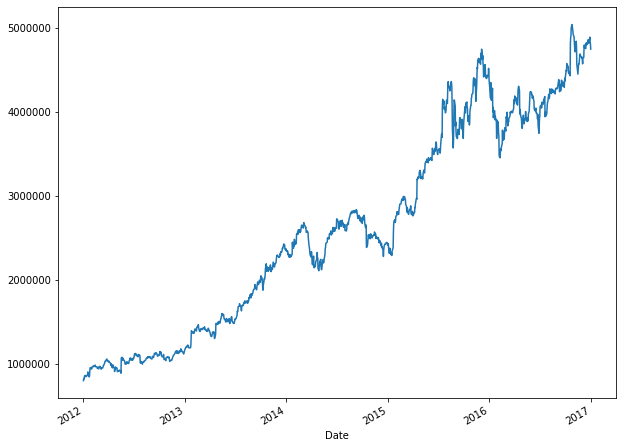

In [15]:
portfolio_value['Total Value of Portfolio'].plot(figsize = (10,8))

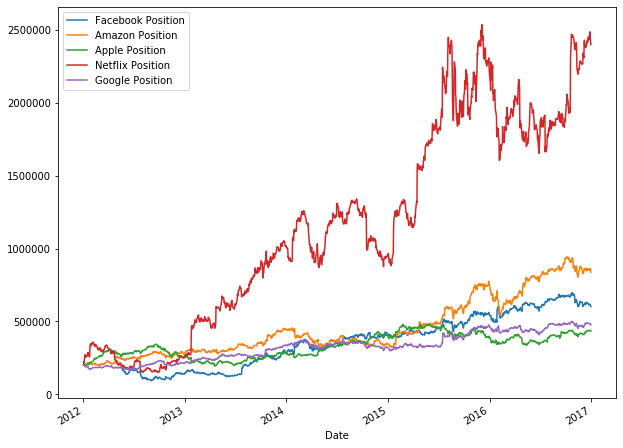

In [16]:
portfolio_value.drop('Total Value of Portfolio',axis = 1).plot(figsize = (10,8))

## Portfolio Statistics

In [17]:
portfolio_value.tail()

,Facebook Position,Amazon Position,Apple Position,Netflix Position,Google Position,Total Value of Portfolio
Date,,,,,,
2016-12-23,613468.369263,849678.824778,435509.744719,2.433915e+06,484096.360912,4.816668e+06
2016-12-27,617339.492255,861755.013126,438275.597887,2.487403e+06,485372.821978,4.890146e+06
2016-12-28,611637.432713,862570.518907,436406.778179,2.439729e+06,482160.694601,4.832504e+06
2016-12-29,608655.621760,854772.943082,436294.648996,2.428876e+06,481147.915634,4.809747e+06
2016-12-30,601855.000288,837703.178238,432893.397128,2.399225e+06,474897.451355,4.746574e+06


In [18]:
#Calculate the percentage change in the total portfolio value
portfolio_value['Daily Return'] = portfolio_value['Total Value of Portfolio'].pct_change(1)
portfolio_value.head()

,Facebook Position,Amazon Position,Apple Position,Netflix Position,Google Position,Total Value of Portfolio,Daily Return
Date,,,,,,,
2012-01-03,NaN,200000.000000,200000.000000,200000.000000,200000.000000,800000.000000,NaN
2012-01-04,NaN,198301.960565,201074.824308,222729.789590,200862.626050,822969.200513,0.028712
2012-01-05,NaN,198413.673686,203307.151716,219545.957918,198076.373965,819343.157285,-0.004406
2012-01-06,NaN,203999.329721,205432.483039,238898.117386,195374.280519,843704.210665,0.029732
2012-01-09,NaN,199474.948333,205106.631326,271816.168328,187090.665905,863488.413891,0.023449


In [19]:
#Average Daily Return
portfolio_value['Daily Return'].mean()

0.0015782775600363744

In [20]:
#std of the Daily Return
portfolio_value['Daily Return'].std()

0.01807608582667882

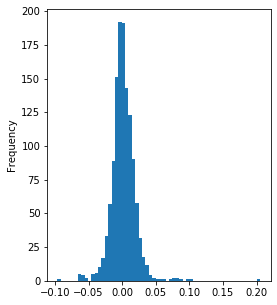

In [21]:
#Plot the daily return using a histogram
portfolio_value['Daily Return'].plot(kind = 'hist',figsize = (4,5), bins = 60)

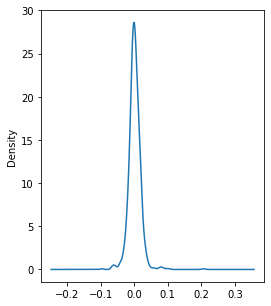

In [22]:
#Plot the daily return using a kernel density plot
portfolio_value['Daily Return'].plot(kind = 'kde', figsize = (4,5))

In [23]:
#Overall percentage on return (overall cumulative return)
cumulative_return = 100 * (portfolio_value['Total Value of Portfolio'][-1] / portfolio_value['Total Value of Portfolio'][0] - 1)

In [24]:
cumulative_return

493.3217291513597

In [25]:
#Calculate the risk adjusted return
SR = portfolio_value['Daily Return'].mean() / portfolio_value['Daily Return'].std()
SR

0.0873130153933528

In [26]:
#Annualized Sharpe Ratio
ASR = (255**0.5) * SR
ASR

1.3942770447638322

In [27]:
portfolio_value.tail()

,Facebook Position,Amazon Position,Apple Position,Netflix Position,Google Position,Total Value of Portfolio,Daily Return
Date,,,,,,,
2016-12-23,613468.369263,849678.824778,435509.744719,2.433915e+06,484096.360912,4.816668e+06,-0.001488
2016-12-27,617339.492255,861755.013126,438275.597887,2.487403e+06,485372.821978,4.890146e+06,0.015255
2016-12-28,611637.432713,862570.518907,436406.778179,2.439729e+06,482160.694601,4.832504e+06,-0.011787
2016-12-29,608655.621760,854772.943082,436294.648996,2.428876e+06,481147.915634,4.809747e+06,-0.004709
2016-12-30,601855.000288,837703.178238,432893.397128,2.399225e+06,474897.451355,4.746574e+06,-0.013134


In [49]:
#We want to see the quality of our sharpe ratio for each of our stocks.
companies_position = [portfolio_value['Facebook Position'],portfolio_value['Amazon Position'],
                      portfolio_value['Apple Position'],portfolio_value['Netflix Position'], 
                      portfolio_value['Google Position']]
comp_names = ['Facebook','Amazon','Apple','Netflix','Google']    

for sharpe_companies,companies_nam in zip(companies_position,comp_names):
    sharpe_calc = sharpe_companies.mean() / sharpe_companies.std()
    if(sharpe_calc < 1):
        print(companies_nam, ": Not good,", "sharpe ratio:","%.2f" % sharpe_calc)
    elif(sharpe_calc > 1 and sharpe_calc < 2):
        print(companies_nam , ": Good/Acceptable,", "sharpe ratio:",sharpe_calc)
    elif(sharpe_calc > 2 and sharpe_calc < 3):
        print(companies_nam , ": Very Good,", "sharpe ratio:",sharpe_calc)
    elif(sharpe_calc > 3):
        print(companies_nam , ": Excellent,", "sharpe ratio:",sharpe_calc)

Facebook : Very Good, sharpe ratio: 2.062190063772052
Amazon : Very Good, sharpe ratio: 2.2220930519784923
Apple : Excellent, sharpe ratio: 4.204286672797163
Netflix : Good/Acceptable, sharpe ratio: 1.6521258315918403
Google : Excellent, sharpe ratio: 3.4219904448586567


## Optimizing FAANG Portfolio